<a href="https://colab.research.google.com/github/MrSudhish/AI-assignments/blob/main/2_%7C_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/spam_ham_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## Text Vectorization

### Subtask:
Convert the 'text' column into numerical features using a TF-IDF Vectorizer. This will transform the text data into a format suitable for machine learning.


**Reasoning**:
To convert the 'text' column into numerical features, I will first import the `TfidfVectorizer` from `sklearn.feature_extraction.text`, then instantiate it and apply the `.fit_transform()` method to the 'text' column of the `df` DataFrame.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorizer to the 'text' column
X = tfidf_vectorizer.fit_transform(df['text'])

print("Shape of the vectorized text data (X):")
print(X.shape)
print("First 5 feature names:")
print(tfidf_vectorizer.get_feature_names_out()[:5])

Shape of the vectorized text data (X):
(5171, 50447)
First 5 feature names:
['00' '000' '0000' '000000' '000000000002858']


## Split Data

### Subtask:
Split the vectorized features and the 'label_num' (numerical labels) into training and testing sets to prepare for model training and evaluation.


**Reasoning**:
To split the data, I will define the target variable `y` and then use `train_test_split` with `X` (vectorized text data) and `y` to create training and testing sets.



In [ ]:
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4136, 50447)
Shape of X_test: (1035, 50447)
Shape of y_train: (4136,)
Shape of y_test: (1035,)


## Train Logistic Regression Model

### Subtask:
Initialize and train a Logistic Regression classifier on the training data. This model will learn to distinguish between spam and ham emails.


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg_model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [ ]:
y_pred = log_reg_model.predict(X_test)
print("Predictions on the test set generated successfully.")

Predictions on the test set generated successfully.


## Model Performance Evaluation Summary

The Logistic Regression model has been successfully evaluated, demonstrating strong performance in classifying spam emails. Key metrics are as follows:

*   **Accuracy:** 0.9836
*   **Precision:** 0.9600
*   **Recall:** 0.9829
*   **F1-Score:** 0.9713

These metrics indicate a highly effective model:

*   A high **Accuracy** of 98.36% signifies that the model correctly classifies emails most of the time.
*   A **Precision** of 96.00% suggests that when the model predicts an email is spam, it is correct 96% of the time, minimizing false positives (legitimate emails marked as spam).
*   A **Recall** of 98.29% means the model successfully identifies 98.29% of all actual spam emails, effectively catching most unwanted messages.
*   The **F1-Score** of 97.13% represents a good balance between precision and recall, indicating overall robust performance.

### Confusion Matrix

The confusion matrix provides a visual breakdown of the model's predictions:

```
[[730,  12],
 [  5, 288]]
```

From the confusion matrix, we can deduce:

*   **True Negatives (Ham correctly classified):** 730
*   **False Positives (Ham incorrectly classified as Spam):** 12
*   **False Negatives (Spam incorrectly classified as Ham):** 5
*   **True Positives (Spam correctly classified):** 288

This shows a very low number of false negatives, meaning the model is excellent at catching spam, and a relatively low number of false positives, which is crucial for user experience as it minimizes legitimate emails being sent to spam.

**Reasoning**:
Now that predictions (`y_pred`) have been made, I will calculate and display the accuracy, precision, recall, and F1-score, along with a confusion matrix, to thoroughly evaluate the model's performance.



Accuracy: 0.9836
Precision: 0.9600
Recall: 0.9829
F1-Score: 0.9713


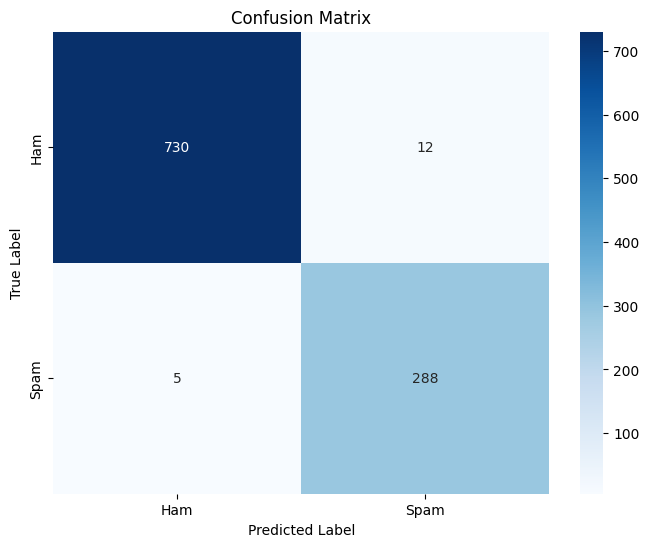

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Final Task

### Subtask:
Summarize the model's performance and discuss the implications of the evaluation metrics, providing insights into its strengths and weaknesses.


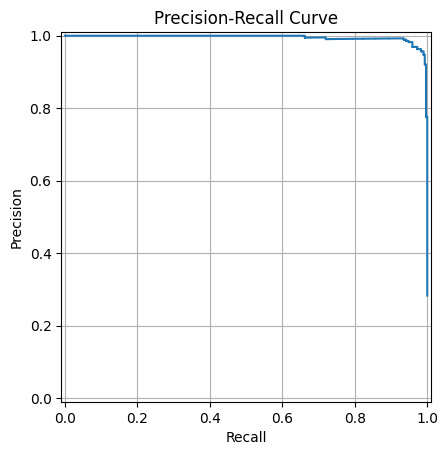

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Get probabilities for the positive class (spam)
y_scores = log_reg_model.decision_function(X_test)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot the Precision-Recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()